In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('D:/AGTS/Bibliotheques and others/SEABORN/titanic.xls')

In [3]:
draft = data.select_dtypes(include=['int'])
draft.shape

(1309, 4)

In [4]:
draft.isnull().sum()

pclass      0
survived    0
sibsp       0
parch       0
dtype: int64

<AxesSubplot:>

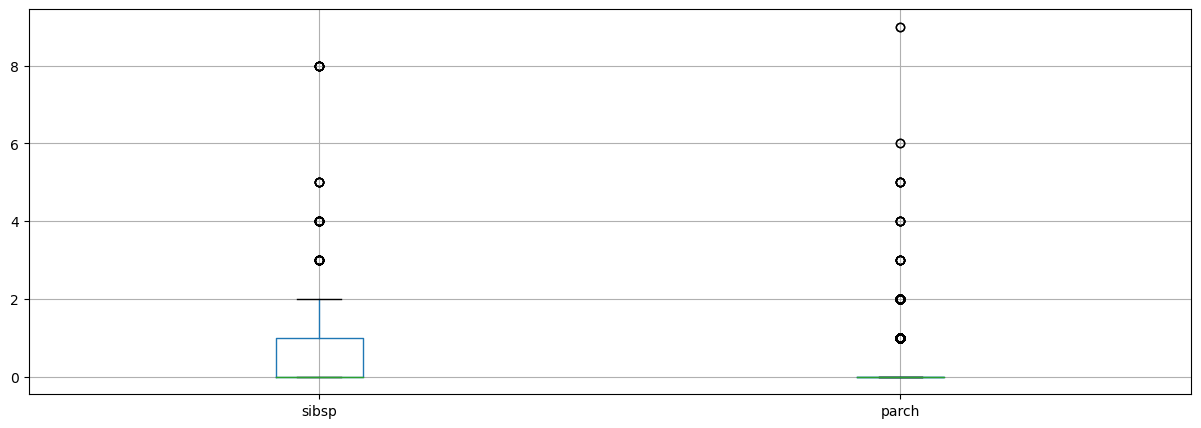

In [5]:
draft[['sibsp','parch']].boxplot(figsize=(15,5))

In [6]:
def find_all_outliers(v):
    Q1 = np.quantile(v,0.25)
    Q3 = np.quantile(v,0.75)
    EIQ = Q3 - Q1 
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [7]:
outliers = find_all_outliers(draft['parch'])
# outliers[0]  #indices 
outliers[1]  #valeurs

[2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,


##### Détection avec Seaborn

In [8]:
sns.boxplot(x = 'parch', data = draft)

<AxesSubplot:xlabel='parch'>

### Traitement des valeurs aberrantes

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('C:/Users/Prelude/Documents/Preprocess/Traitement/supermarket_sales - Sheet1.csv')

In [11]:
sousbase = df.copy() ## Lors de la création du sous data

In [12]:
cpp = df.copy() ## Lors de la suppression des valeurs aberrantes

In [34]:
delete = df.copy()

In [36]:
delete

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.83000,4.761905,26.141500,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.40000,4.761905,3.820000,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.31000,4.761905,16.215500,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.76000,4.761905,23.288000,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.17000,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.017500,42.367500,1/29/2019,13:46,Ewallet,40.35000,4.761905,2.017500,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,47.225813,991.742062,3/2/2019,17:16,Ewallet,944.51625,4.761905,47.225813,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592000,33.432000,2/9/2019,13:22,Cash,31.84000,4.761905,1.592000,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291000,69.111000,2/22/2019,15:33,Cash,65.82000,4.761905,3.291000,4.1


In [37]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [38]:
# Identifiant de la facture : Numéro d'identification de la facture du bordereau de vente généré par ordinateur
# Succursale : Succursale du supercentre (3 succursales sont disponibles identifiées par A, B et C).
# Ville : Localisation des supercentres
# Type de client : Type de clients, enregistrés par Membres pour les clients utilisant la carte de membre et Normal pour ceux sans carte de membre.
# Sexe : Sexe type de client
# Ligne de produits : Groupes généraux de catégorisation des articles - Accessoires électroniques, Accessoires de mode, Aliments et boissons, Santé et beauté, Maison et style de vie, Sports et voyages
# Prix unitaire : Prix de chaque produit en $
# Quantité : Nombre de produits achetés par client
# Taxe : 5% de taxe pour les achats du client
# Total : Prix total TTC
# Date : Date d'achat (Record disponible de janvier 2019 à mars 2019)
# Heure : Heure d'achat (10h à 21h)
# Paiement : Paiement utilisé par le client pour l'achat (3 méthodes sont disponibles – espèces, carte de crédit et portefeuille électronique)
# COGS : Coût des marchandises vendu
# Pourcentage de marge brute : Pourcentage de marge brute
# Revenu brut : Revenu brut
# Note : Note de stratification des clients sur leur expérience d'achat globale (Sur une échelle de 1 à 10)

#### Detection des Outliers

In [39]:
import matplotlib.pyplot as plt

In [40]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.83000,4.761905,26.141500,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.40000,4.761905,3.820000,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.31000,4.761905,16.215500,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.76000,4.761905,23.288000,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.17000,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.017500,42.367500,1/29/2019,13:46,Ewallet,40.35000,4.761905,2.017500,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,47.225813,991.742062,3/2/2019,17:16,Ewallet,944.51625,4.761905,47.225813,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592000,33.432000,2/9/2019,13:22,Cash,31.84000,4.761905,1.592000,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291000,69.111000,2/22/2019,15:33,Cash,65.82000,4.761905,3.291000,4.1


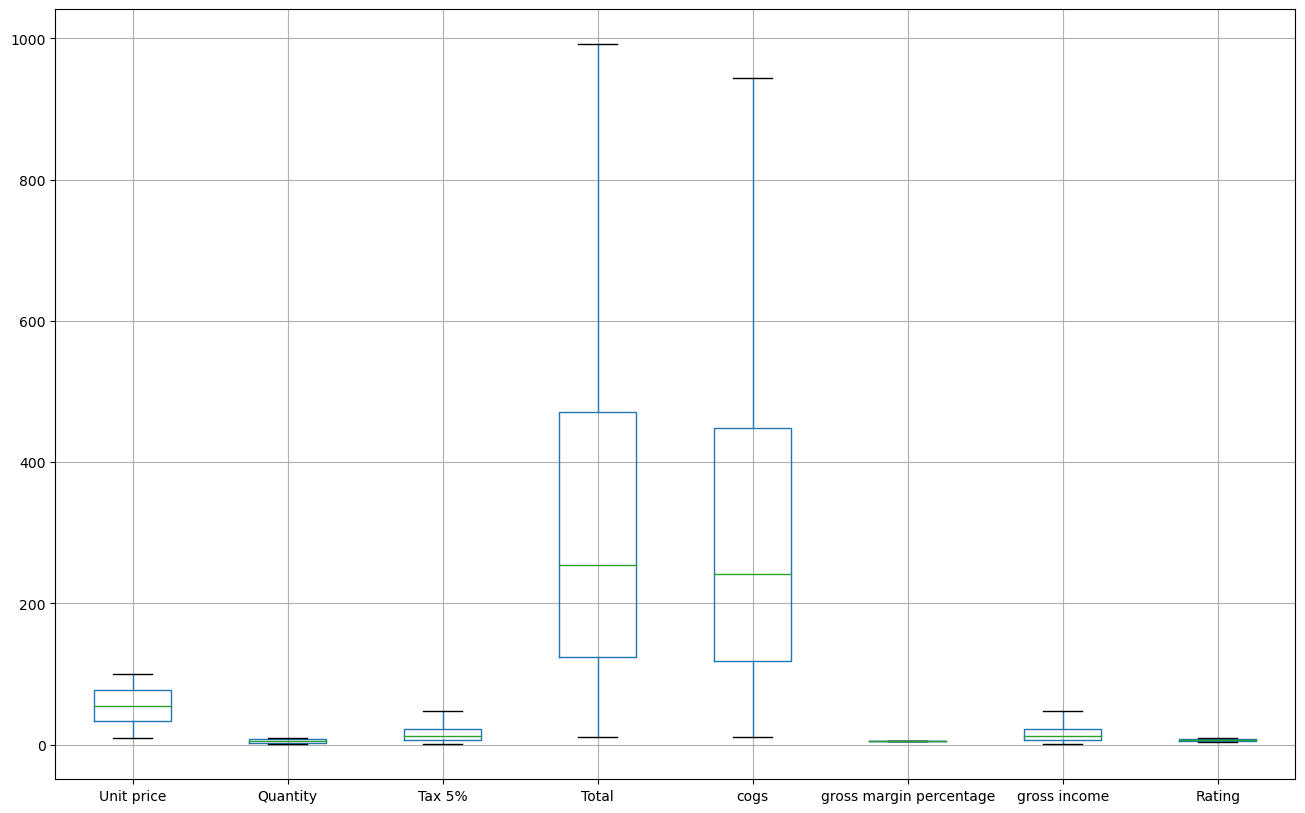

In [41]:
plt.figure(figsize=(16,10))
df.boxplot()
plt.show()

#### Comment remplacer les outliers ?

In [42]:
features = ['Tax 5%', 'Total', 'cogs', 'gross income']

In [43]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [44]:
for feature in features:
    impute_outliers(df, feature)

In [45]:
dp = df[features]

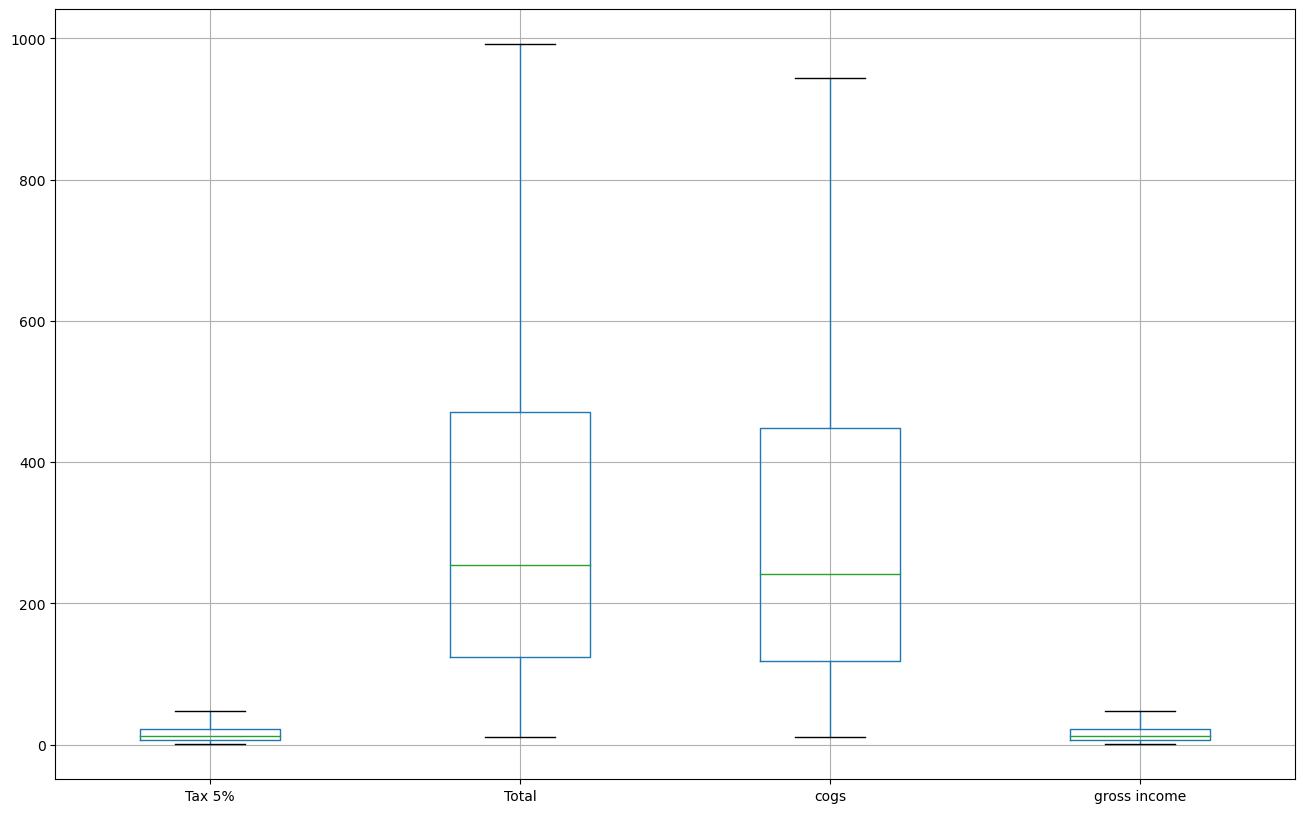

In [46]:
plt.figure(figsize=(16,10))
dp.boxplot()
plt.show()

### Créer un sous dataset composé uniquement des outliers

In [47]:
def subdataset_outliers (df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)] 

In [48]:
for feature in features:
    subdataset_outlier = subdataset_outliers(sousbase, feature)

In [49]:
subdataset_outlier[features]

,Tax 5%,Total,cogs,gross income
166,47.790,1003.590,955.8,47.790
167,49.490,1039.290,989.8,49.490
350,49.650,1042.650,993.0,49.650
357,47.720,1002.120,954.4,47.720
422,48.605,1020.705,972.1,48.605
557,49.260,1034.460,985.2,49.260
699,48.750,1023.750,975.0,48.750
792,48.685,1022.385,973.7,48.685
996,48.690,1022.490,973.8,48.690


In [50]:
subdataset_outlier[features].shape

(9, 4)

In [51]:
subdataset_outlier[features].max()

Tax 5%            49.65
Total           1042.65
cogs             993.00
gross income      49.65
dtype: float64

### SUPPRESSION DES VALEURS ABERRANTES

In [52]:
def drop_outliers (df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    limit = 1.5*(q3-q1)
    df.drop(df[df[feature] > limit + q3].index, inplace=True)
    df.drop(df[df[feature] > q1 - limit].index, inplace=True)

In [55]:
for feature in features:
    drop_outliers(delete,feature)

IndexError: index -1 is out of bounds for axis 0 with size 0